<a href="https://colab.research.google.com/github/byrkbrk/unet-implementation/blob/main/unet_cell_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone repository
!git clone https://github.com/byrkbrk/unet-implementation.git
!ls ./unet-implementation
!cat ./unet-implementation/README.md

# add directory to path
import sys
sys.path.append("./unet-implementation/")

Cloning into 'unet-implementation'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 35 (delta 13), reused 22 (delta 3), pack-reused 0
Unpacking objects: 100% (35/35), 14.25 MiB | 8.19 MiB/s, done.
model.py   test-volume.tif   train-volume.tif
README.md  train-labels.tif  utils.py
# unet-implementation

We implement U-net for image segmentation task.


In [2]:
# import modules
from tqdm.auto import tqdm
from skimage import io
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

from model import UNet
from utils import crop, show_tensor_images

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


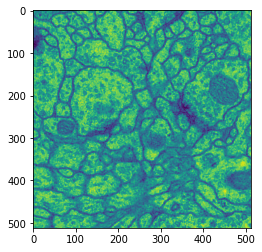

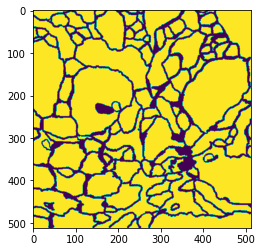

volumes unique: 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 2

In [3]:
# read input images as np array
dir = "./unet-implementation/"
volumes = io.imread(dir + "train-volume.tif")
labels = io.imread(dir + "train-labels.tif")

# plot images
plt.imshow(volumes[0])
plt.show()
plt.imshow(labels[0])
plt.show()

# check unique pixels
print("volumes unique: ")
print(np.unique(volumes[0]))
print("labels unique: ")
print(np.unique(labels[0]))



In [4]:
# convert to torch and normalize 
volumes = torch.Tensor(volumes)[:, None, :, :]/255
labels = torch.Tensor(labels)[:, None, :, :]/255

# crop labels
target_dim = 373 # i.e. unet output shape: (-1, 1, 373, 373)
labels = crop(labels, (labels.shape[0], labels.shape[1], target_dim, target_dim))

# construct dataset
dataset = torch.utils.data.TensorDataset(volumes, labels)


In [11]:
# set dataloadaer
dataloader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True
)

# instantiate model
unet = UNet(1, 1)
unet.to(device)

# define criterion
criterion = nn.BCEWithLogitsLoss()

# define optimizer
optimizer = optim.Adam(unet.parameters(), lr=2e-4)



  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 0, Steps: 0, Loss: 0.698


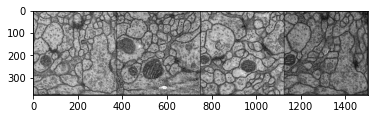

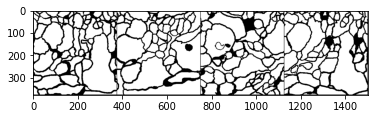

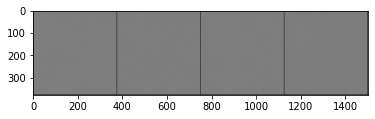

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 5, Steps: 40, Loss: 0.512


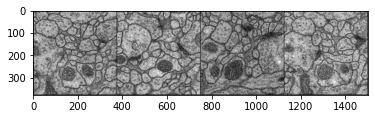

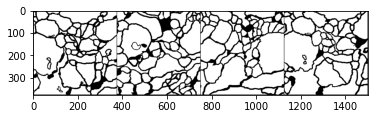

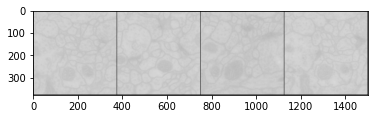

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 10, Steps: 80, Loss: 0.472


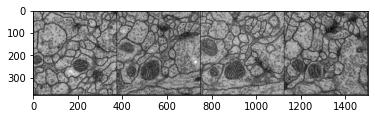

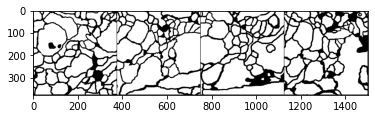

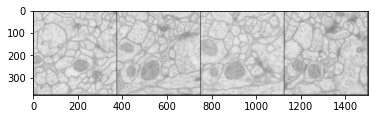

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 15, Steps: 120, Loss: 0.438


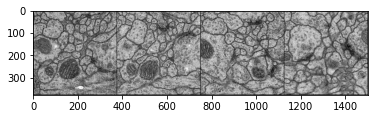

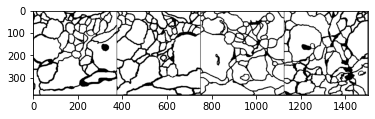

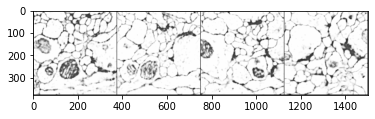

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 20, Steps: 160, Loss: 0.287


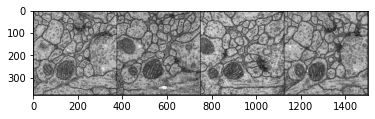

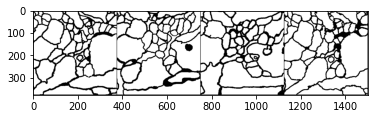

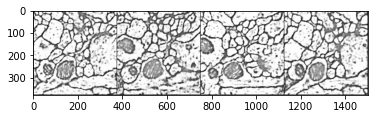

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 25, Steps: 200, Loss: 0.322


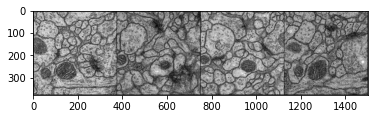

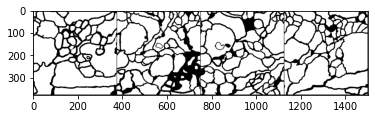

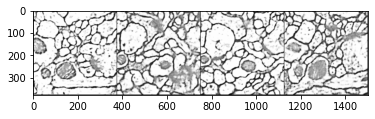

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 30, Steps: 240, Loss: 0.287


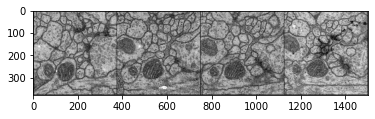

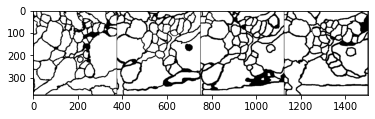

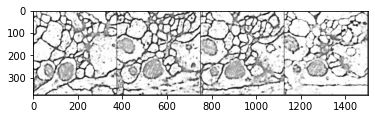

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 35, Steps: 280, Loss: 0.289


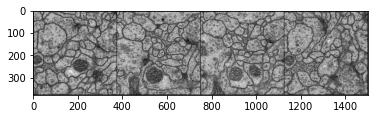

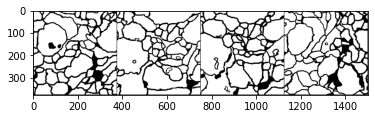

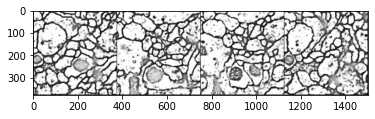

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 40, Steps: 320, Loss: 0.288


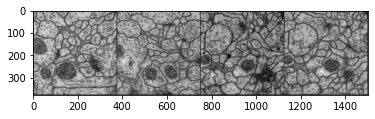

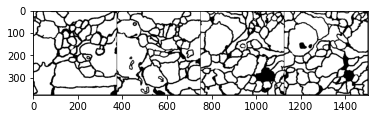

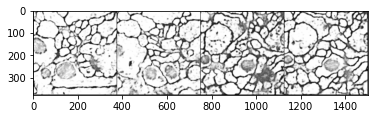

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 45, Steps: 360, Loss: 0.279


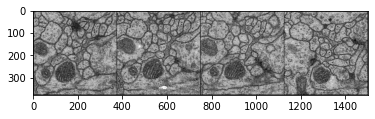

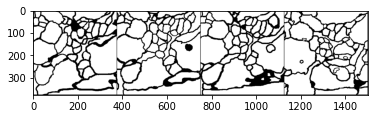

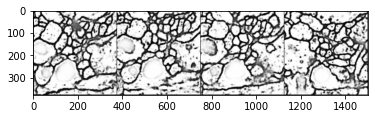

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 50, Steps: 400, Loss: 0.285


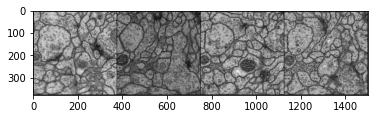

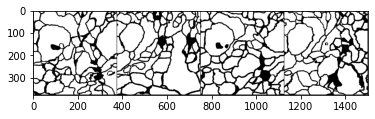

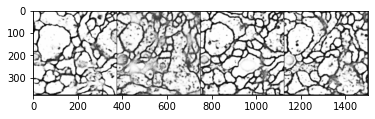

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 55, Steps: 440, Loss: 0.237


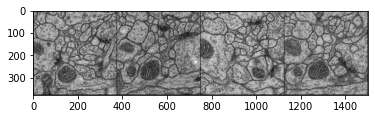

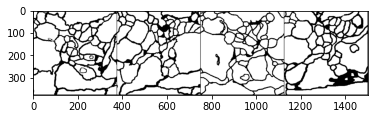

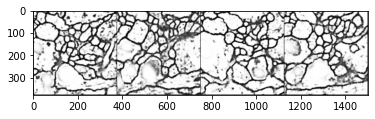

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 60, Steps: 480, Loss: 0.235


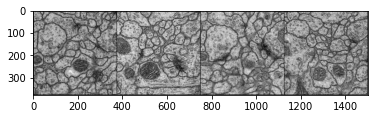

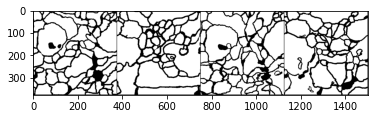

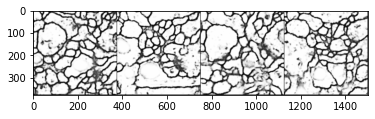

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 65, Steps: 520, Loss: 0.219


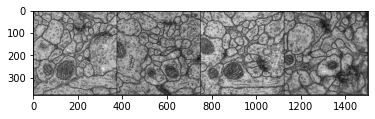

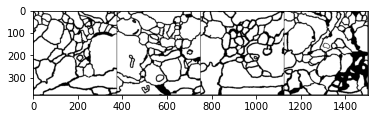

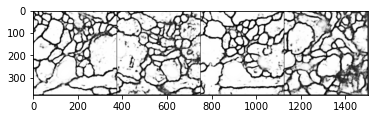

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 70, Steps: 560, Loss: 0.199


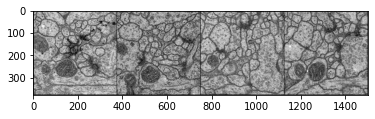

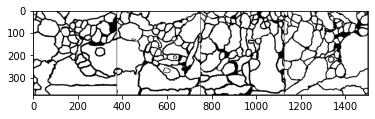

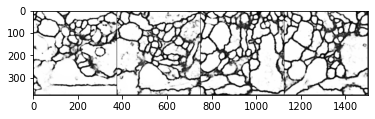

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 75, Steps: 600, Loss: 0.211


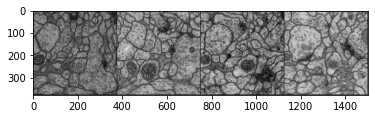

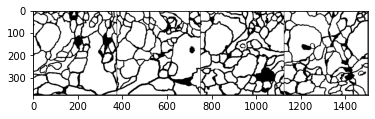

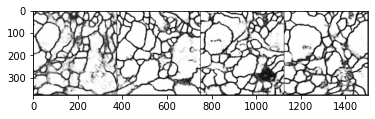

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 80, Steps: 640, Loss: 0.238


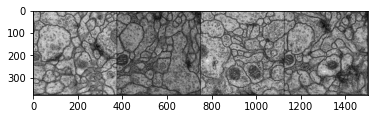

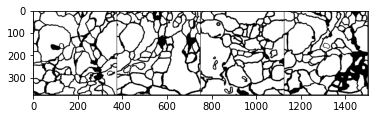

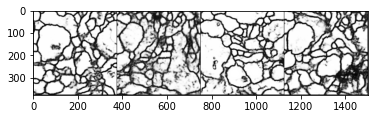

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 85, Steps: 680, Loss: 0.181


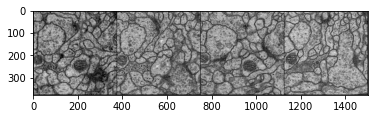

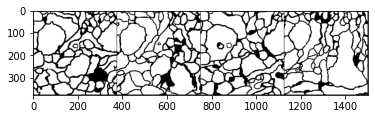

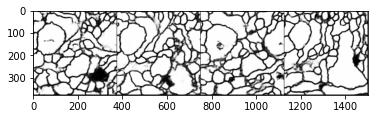

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 90, Steps: 720, Loss: 0.153


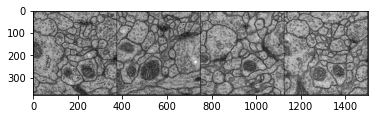

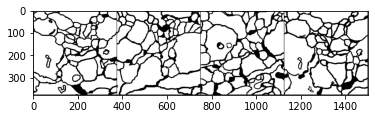

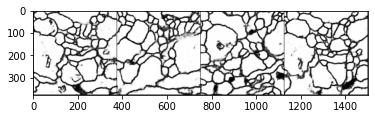

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 95, Steps: 760, Loss: 0.161


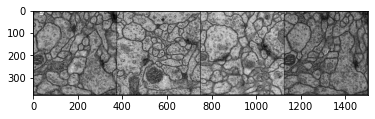

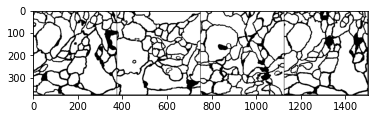

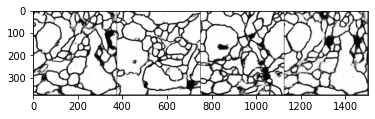

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [16]:
# train
n_epochs = 100
display_step = 40
cur_step = 0

for epoch in range(n_epochs):
    for mini_images, mini_labels in tqdm(dataloader):
        mini_images = mini_images.to(device)
        mini_labels = mini_labels.to(device)
        preds = unet(mini_images)
        loss = criterion(preds, mini_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if cur_step % display_step == 0:
            print(f"Epoch: {epoch}, Steps: {cur_step}, Loss: {loss:.3f}")
            
            # plot input images
            show_tensor_images(
                crop(mini_images, (mini_images.shape[0], 1, target_dim, target_dim)),
                4,
                size=(1, target_dim, target_dim)
            )

            # plot labels
            show_tensor_images(mini_labels, 4, size=(1, target_dim, target_dim))
            
            # plot predictions
            show_tensor_images(torch.sigmoid(preds), 4, size=(1, target_dim, target_dim))

        cur_step += 1


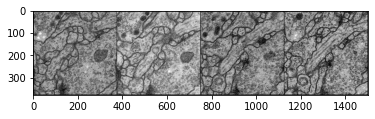

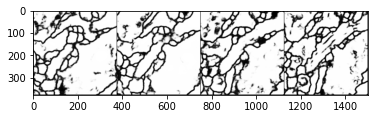

In [28]:
# check performance on test dataset

# read test volumes
test_volumes = io.imread(dir + "test-volume.tif")
test_volumes = torch.Tensor(test_volumes)[:, None, :, :]/255

# get small test images portion
mini_test_volumes = test_volumes[4:8]

# get test predictions
unet.eval().to(device="cpu")
test_preds = unet(mini_test_volumes)

# plot images
show_tensor_images(
                crop(mini_test_volumes, (mini_test_volumes.shape[0], 1, target_dim, target_dim)),
                4,
                size=(1, target_dim, target_dim)
)
show_tensor_images(torch.sigmoid(test_preds), 4, size=(1, target_dim, target_dim))

